# Titanic Survival Prediction Project

## Problem Statement

In this project, our goal is to predict the survival of passengers aboard the Titanic based on various features such as age,Survival , ticket class, and more. By developing classification models, we aim to accurately classify passengers as either survivors or non-survivors

## Data Definition

In [ ]:
The Titanic dataset contains information about passengers aboard the Titanic and includes the following columns:
    
Survived: Whether the passenger survived or not (0 = No, 1 = Yes).
Pclass: Ticket class of the passenger (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
Name: Name of the passenger.
Sex: Gender of the passenger.
Age: Age of the passenger.

## Importing Libraries

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [3]:
# Load the Titanic dataset
data=pd.read_csv(r'G:\final project\project 2\Titanic.csv')
data.head()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


## EDA (Exploratory Data Analysis)

In [4]:
# Exploratory Data Analysis
# Dimensions of the data
data.shape


(1313, 5)

In [5]:
#Checking for Datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1312 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [6]:
# By default the describe function returns the summary of numerical variables
data.describe()

,Age,Survived
count,756.000000,1313.000000
mean,30.397989,0.342727
std,14.259049,0.474802
min,0.170000,0.000000
25%,21.000000,0.000000
50%,28.000000,0.000000
75%,39.000000,1.000000
max,71.000000,1.000000


## Correlation

In [7]:
data.corr()

,Age,Survived
Age,1.000000,-0.061254
Survived,-0.061254,1.000000


## Missing Values

In [8]:
# Check for missing values
print(data.isna().sum())

Name          0
PClass        1
Age         557
Sex           0
Survived      0
dtype: int64


from the above analysis, it is found that there is no missing values

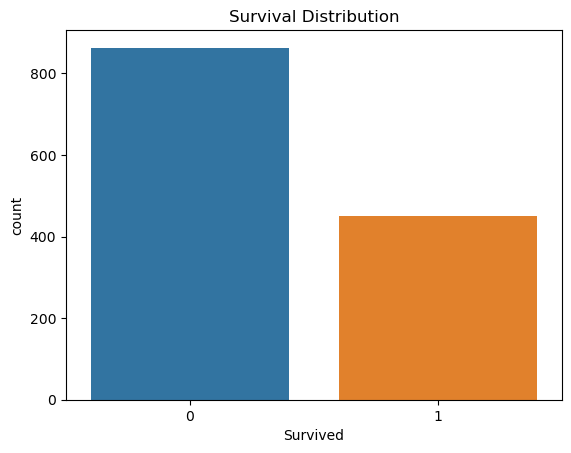

In [9]:
sns.countplot(x='Survived', data=data)
plt.title('Survival Distribution')
plt.show()

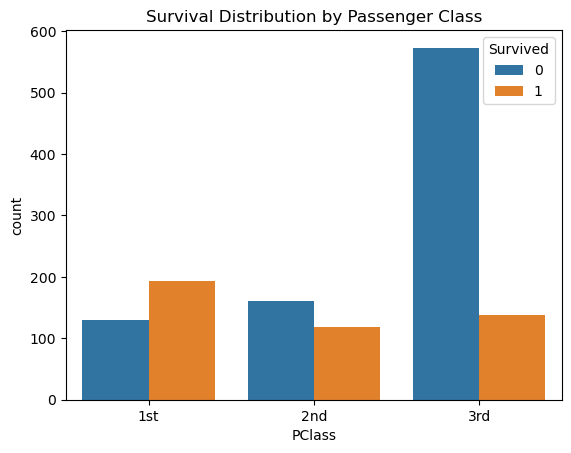

In [10]:
sns.countplot(x='PClass', hue='Survived', data=data)
plt.title('Survival Distribution by Passenger Class')
plt.show()

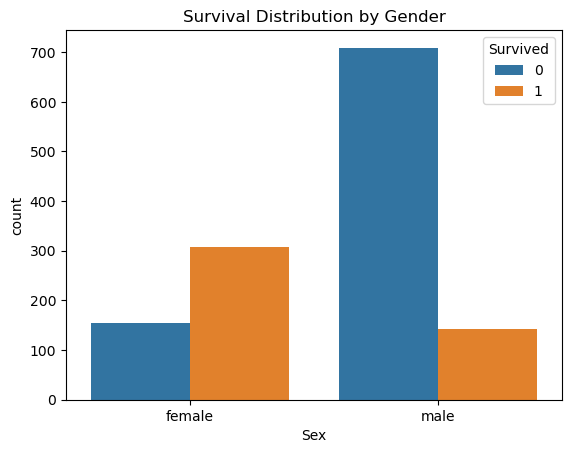

In [11]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival Distribution by Gender')
plt.show()

In [12]:
# Data Preprocessing
data.dropna(subset=['Age'], inplace=True)  # Drop rows with missing values for 'Age' column


## Detecting the outliers

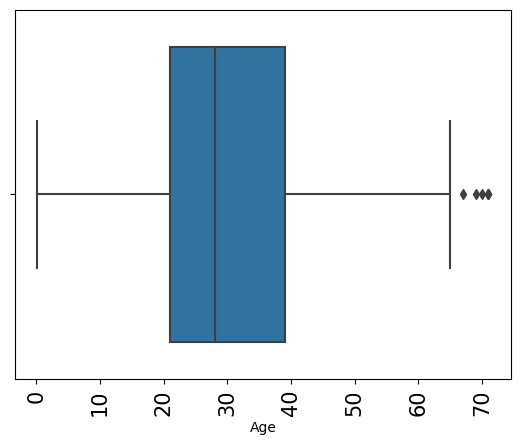

In [13]:
# plotting boxplot for "Age"
sns.boxplot(data['Age'])

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()


In [14]:
# Calculate the IQR for the Age column
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

In [15]:
# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [16]:
# Remove outliers from the Age column
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

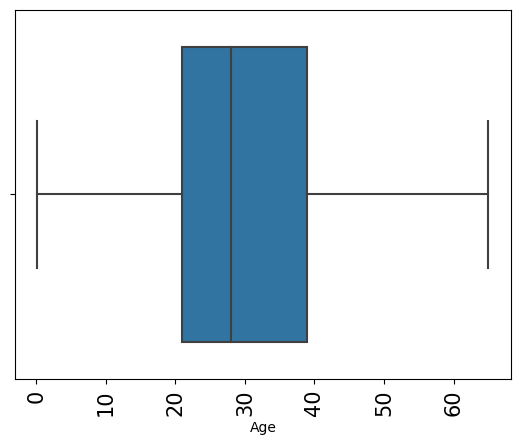

In [17]:
# Verify the updated dataset
# plotting boxplot for "Age"
sns.boxplot(data['Age'])

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

## Model Building

In [38]:
# Encode categorical variables
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])  # Encode 'Sex' column as numeric
data['Pclass'] = LabelEncoder().fit_transform(data['Pclass'])  # Encode 'Pclass' column as numeric

In [39]:
# Split the dataset into features (X) and target (y)
X = data[['Pclass', 'Sex', 'Age']]
y = data['Survived']



In [40]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Building model using Decision Tree

In [68]:
# Decision Tree Model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

In [67]:
# Model evaluation for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)
print(classification_rep_dt)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        93
           1       0.82      0.72      0.77        57

    accuracy                           0.83       150
   macro avg       0.83      0.81      0.82       150
weighted avg       0.83      0.83      0.83       150



The accuracy is 83% for this model

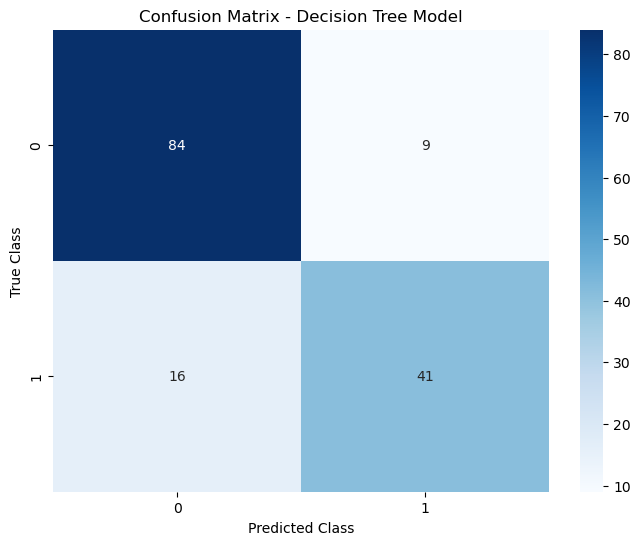

In [75]:
# Decision Tree Model Plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## Building model using Decision Tree

In [43]:
# Random Forest Model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [69]:
# Model evaluation for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
print(classification_rep_rf)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88        93
           1       0.80      0.79      0.80        57

    accuracy                           0.85       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.85      0.85      0.85       150



The accuracy is 85% for this model

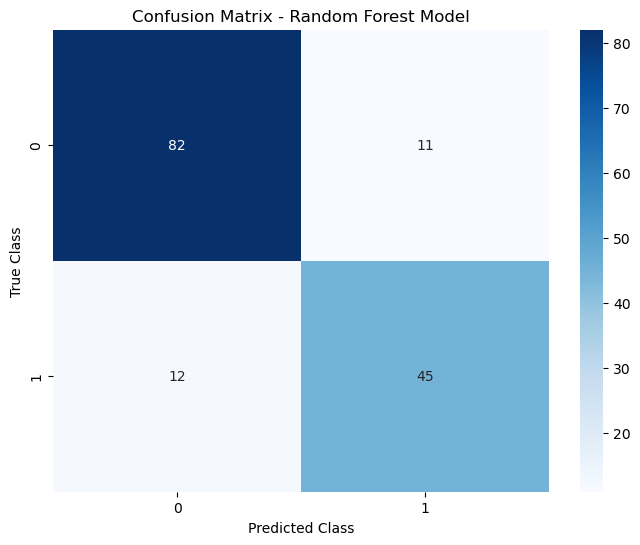

In [74]:
# Random Forest Model Plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## Building model using Logistic Regression

In [54]:
# Logistic Regression Model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)


In [70]:
# Model evaluation for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)
print(classification_rep_lr)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        93
           1       0.78      0.68      0.73        57

    accuracy                           0.81       150
   macro avg       0.80      0.78      0.79       150
weighted avg       0.80      0.81      0.80       150



The accuracy is 81% for this model

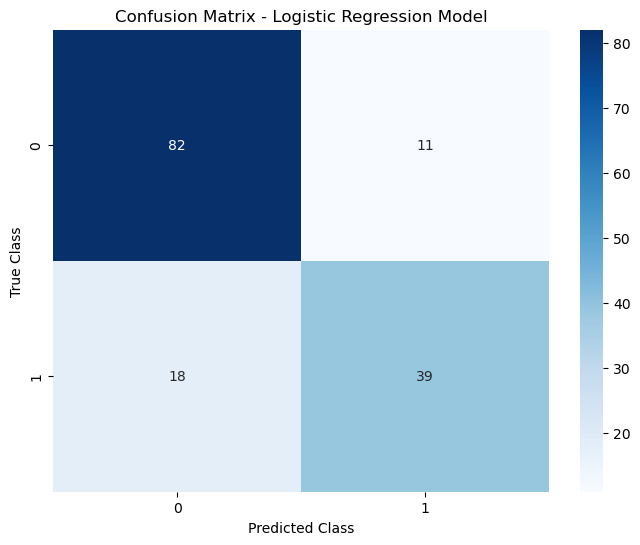

In [76]:
# Logistic Regression Model Plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## Tabulate the results

In [48]:
# Create a table to compare model performance
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression'],
    'Accuracy': [accuracy_dt, accuracy_rf, accuracy_lr],
    'Precision': [precision_dt, precision_rf, precision_lr],
    'Recall': [recall_dt, recall_rf, recall_lr],
    'F1-Score': [f1_dt, f1_rf, f1_lr]
})
print("\nModel Comparison:")
print(model_comparison)


Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0        Decision Tree  0.833333   0.820000  0.719298  0.766355
1        Random Forest  0.846667   0.803571  0.789474  0.796460
2  Logistic Regression  0.806667   0.780000  0.684211  0.728972


## Model Comparision

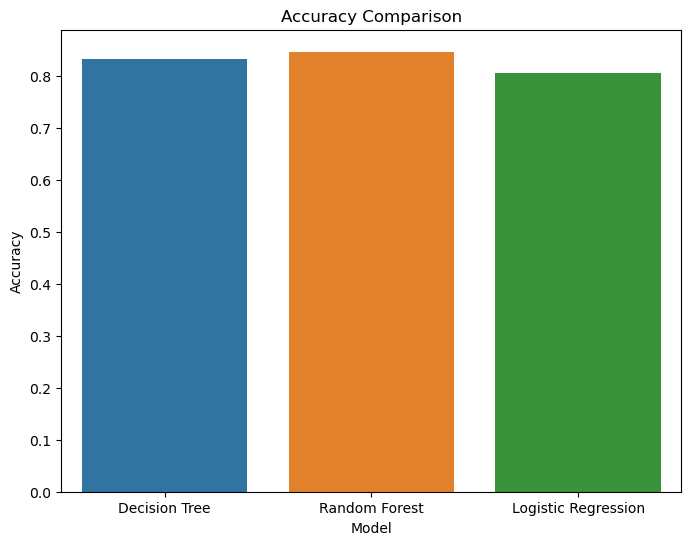

In [49]:
# Plotting model comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=model_comparison)
plt.title('Accuracy Comparison')
plt.show()

### According to the graph we can see that Random Forest has highest accuracy score. Random Forest is known for its ability to handle complex relationships and provide robust predictions, making it a popular choice for classification tasks.